In [1]:
def DataSet(data_name):
    with open(data_name) as f:
        high, wide, long = [int(x) for x in next(f).split()]
        next(f)
        
        shapes = []
        data = []   
        
        for line in f:
            data.append([x for x in line.split()])
            
        for i in range(len(data)):
            for q in range(int(data[i][0])):
                temp = []
                temp.append(data[i][1]+str(q+1))
                for j in range(2,len(data[i])):
                    temp.append(int(data[i][j]))
                temp.append(1)

                shapes.append(temp)  
                
    return shapes

In [2]:
def ChangeOrientation(shape):
    
    if(shape[4] == 1):
        temp = shape[1]
        shape[1] = shape[2]
        shape[2] = temp
        shape[4] = 2
        
    elif(shape[4] == 2):
        temp = shape[1]
        shape[1] = shape[3]
        shape[3] = temp
        shape[4] = 3
        
    elif(shape[4] == 3):
        temp = shape[1]
        shape[1] = shape[2]
        shape[2] = temp
        shape[4] = 4
        
    elif(shape[4] == 4):
        temp = shape[1]
        shape[1] = shape[3]
        shape[3] = temp
        shape[4] = 5
        
    elif(shape[4] == 5):
        temp = shape[1]
        shape[1] = shape[2]
        shape[2] = temp
        shape[4] = 6
        
    elif(shape[4] == 6):
        temp = shape[1]
        shape[1] = shape[3]
        shape[3] = temp
        shape[4] = 1
        
    return shape

In [3]:
shapes = DataSet("DataExample.txt")
print(shapes[0])

['A1', 1, 3, 5, 1]


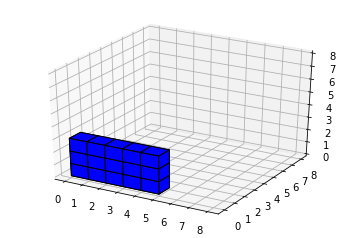

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

ChangeOrientation(shapes[0])
# draw cuboids in the top left and bottom right corners, and a link between them
cube1 = (x < shapes[0][3]) & (y < shapes[0][2]) & (z < shapes[0][1])

# combine the objects into a single boolean array
voxels = cube1

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[cube1] = 'blue'


# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k')

plt.show()